In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob
from tabulate import tabulate

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [2]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_size = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 2**28]
input_type = ["Sorted", "ReverseSorted", "Random", "1_perc_perturbed"]
measurement_regions = ['main', 'comp_large', 'comm']

In [3]:
tk = {}
for in_type in input_type:
    tk[in_type] = th.Thicket.from_caliperreader(glob("*-{}.cali".format(in_type)))


(2/2) Creating Thicket: 100%|██████████| 69/69 [00:02<00:00, 32.07it/s]


In [4]:
for in_type in tk:
    tk[in_type].metadata_column_to_perfdata("num_procs")
    tk[in_type].metadata_column_to_perfdata("input_size")
    #tk.metadata_column_to_perfdata("input_type")

    tk[in_type].dataframe = tk[in_type].dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

    #tk.dataframe.head()


In [5]:
plt.rcParams.update({"font.size": 20})

In [6]:
#define function for graphing in matplotlib:
def show_mpl_plot(fig, ax, title, xlabel, ylabel, legend):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(legend)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.savefig(f'Bitonic_Plots/{title}')
    plt.show()
    return fig, ax


def plot_mpl(df, title, xlabel, ylabel, legend):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    return show_mpl_plot(fig, ax, title, xlabel, ylabel, legend)


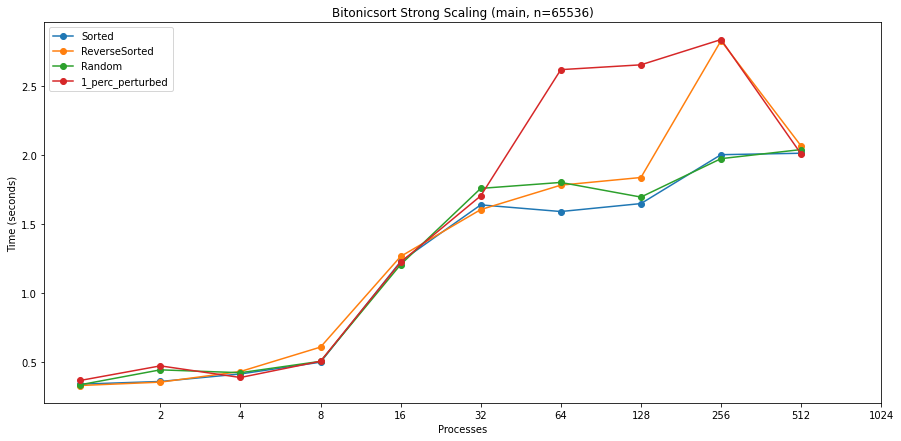

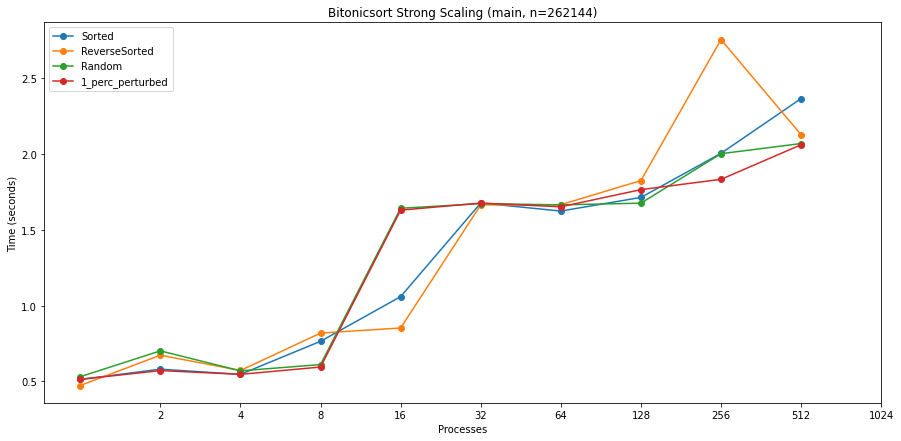

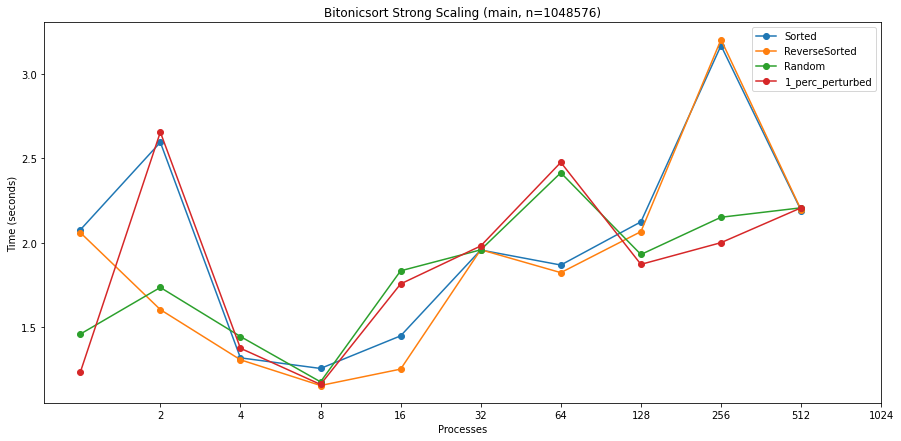

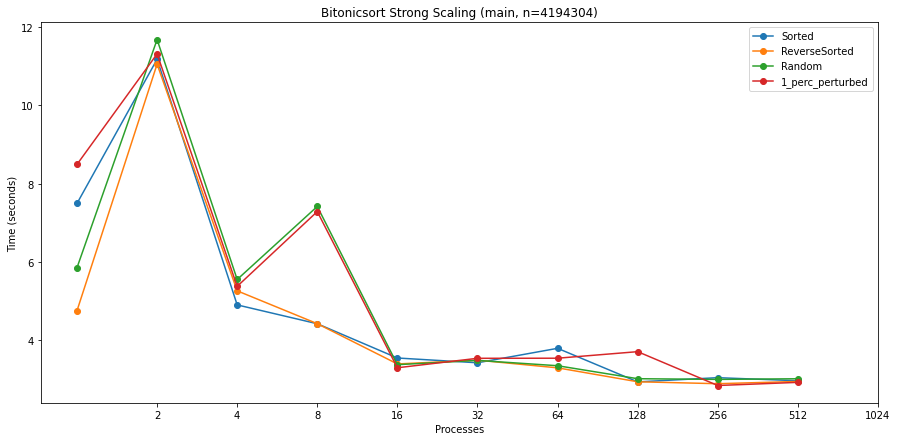

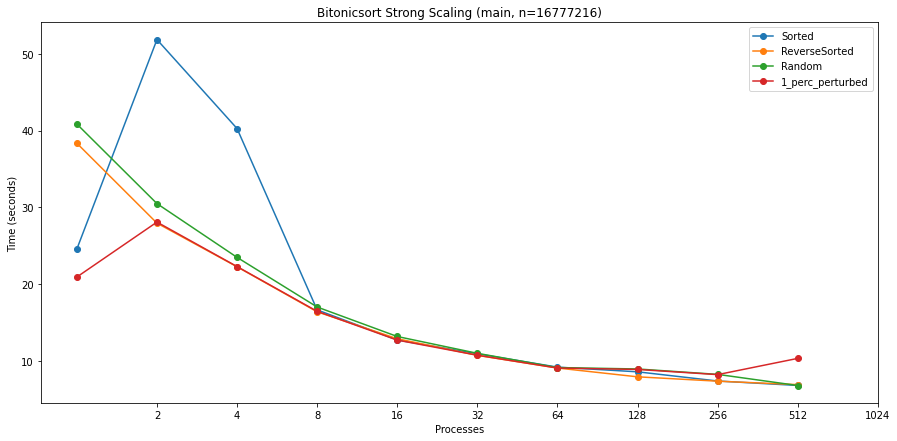

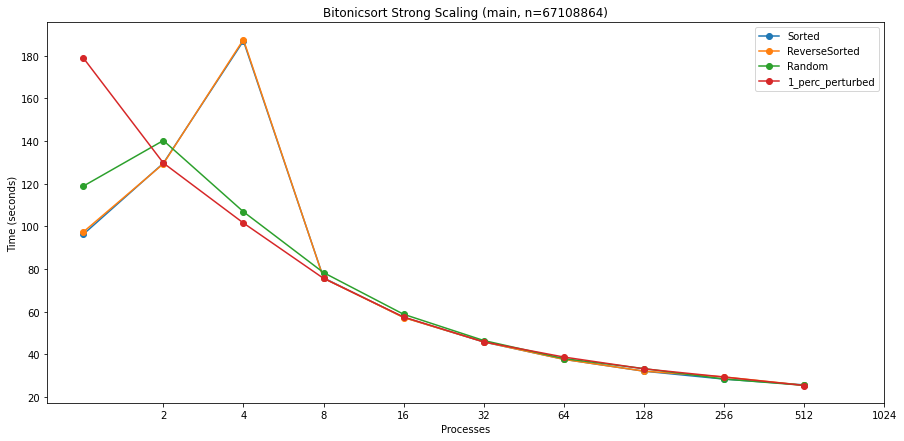

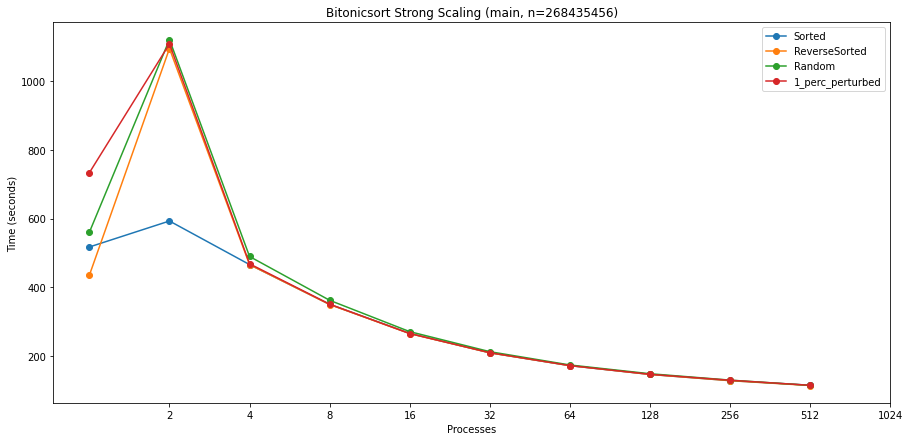

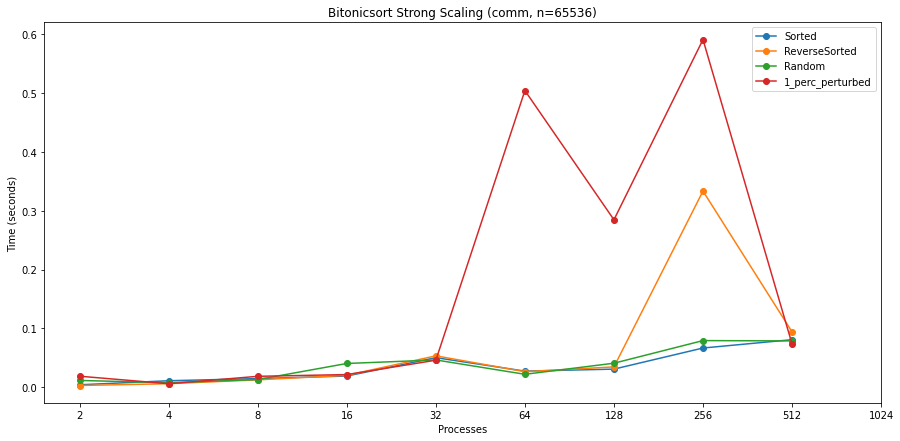

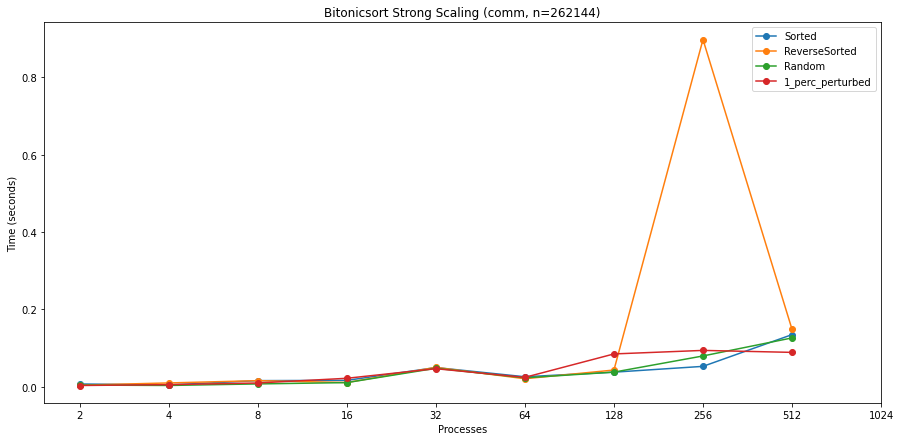

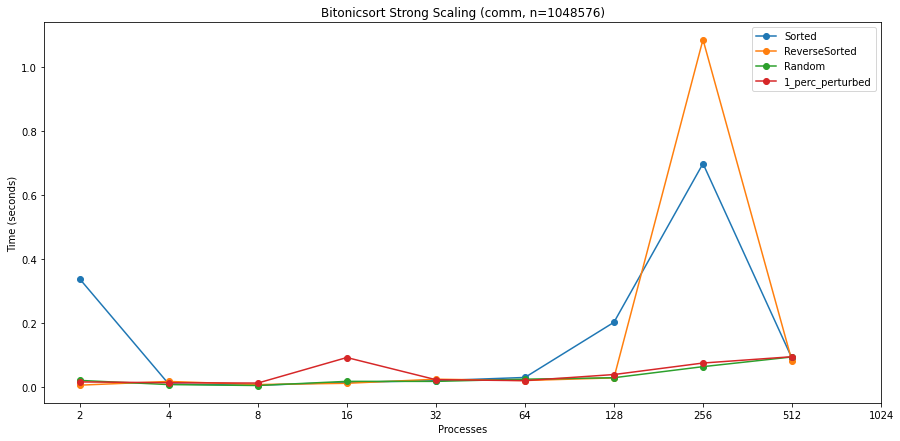

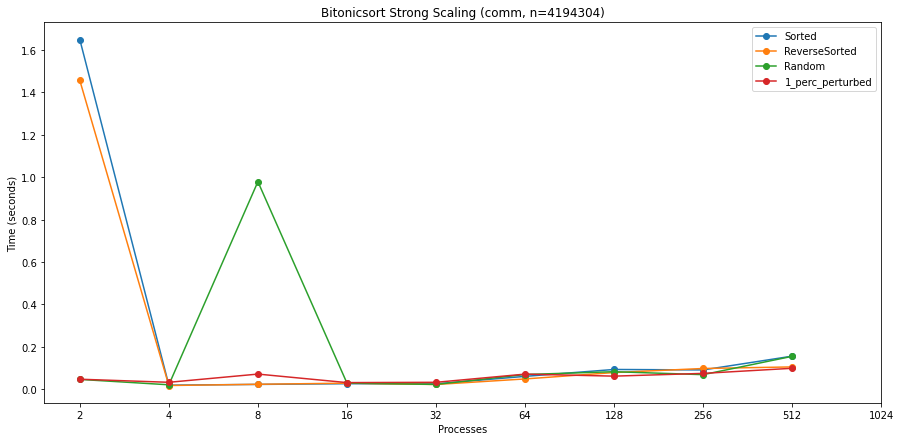

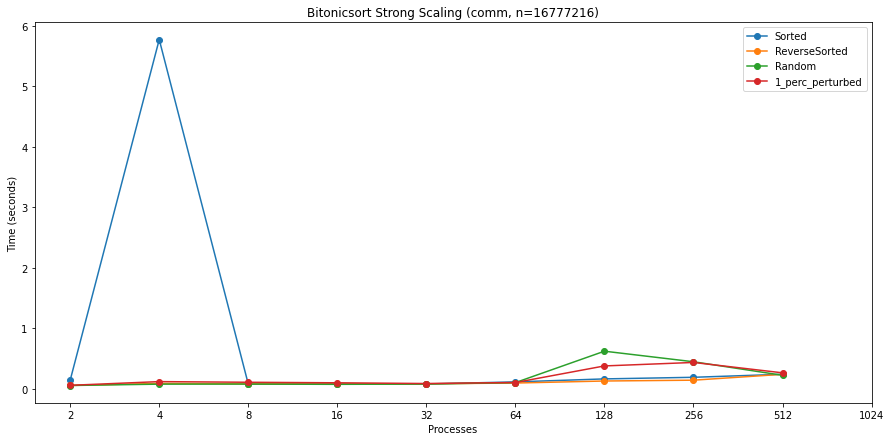

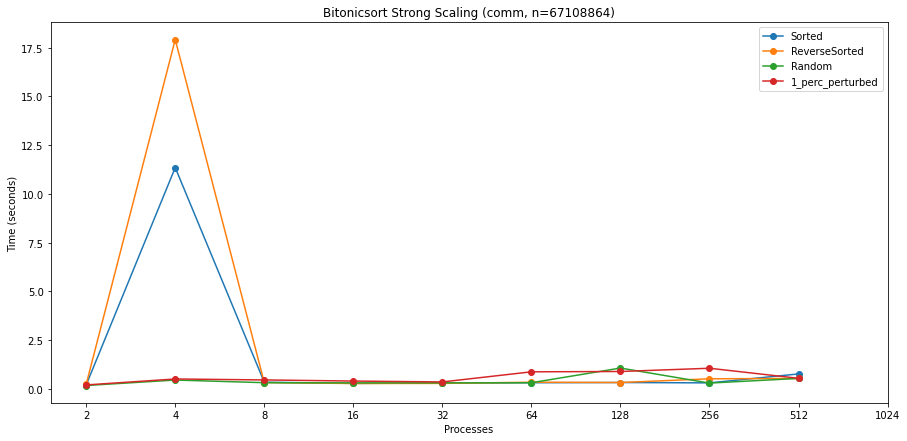

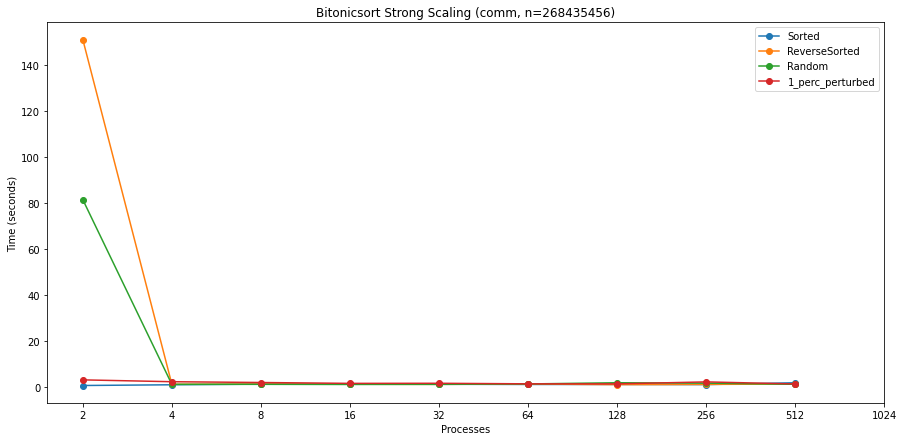

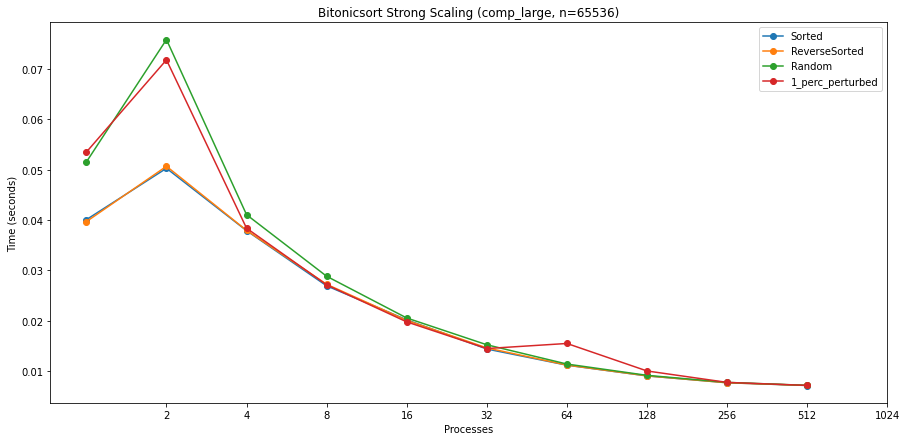

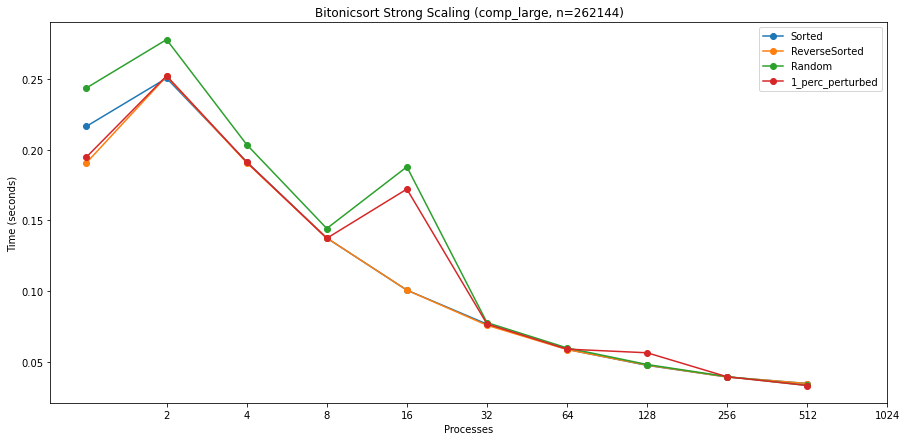

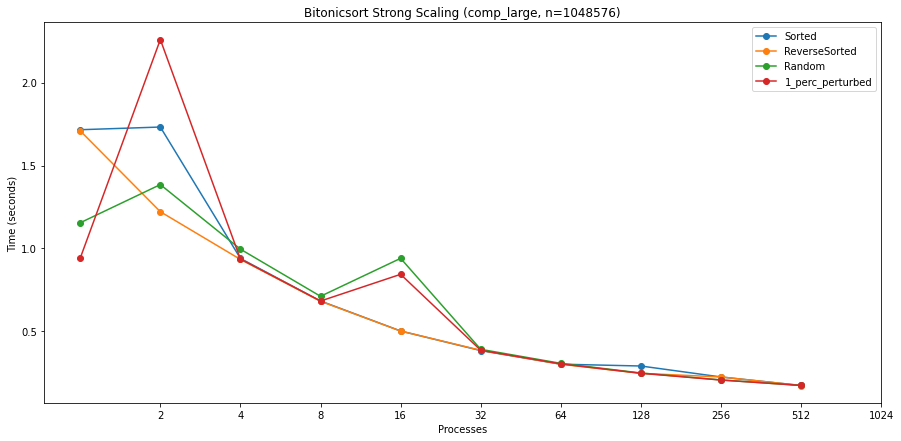

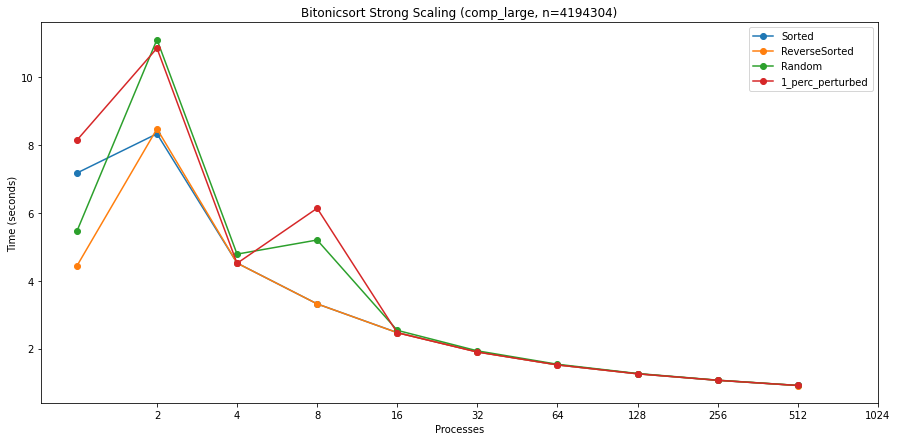

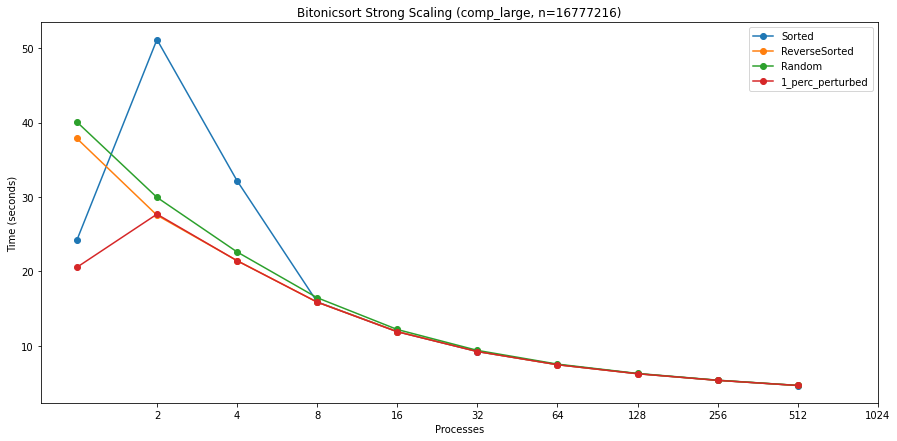

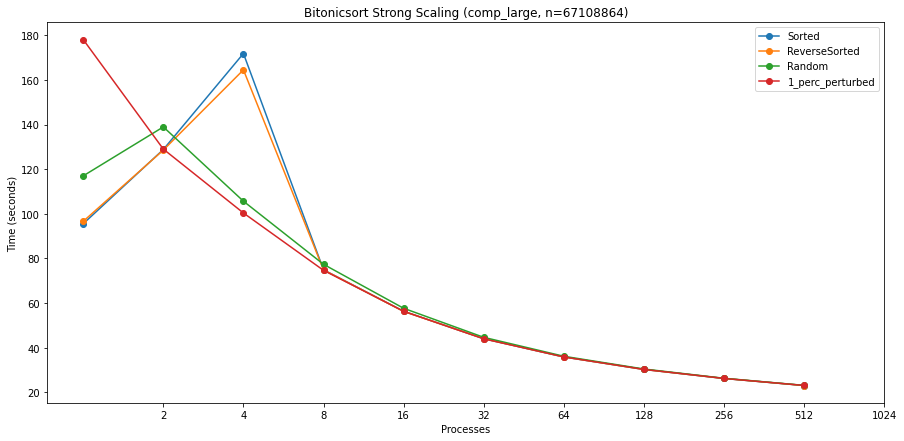

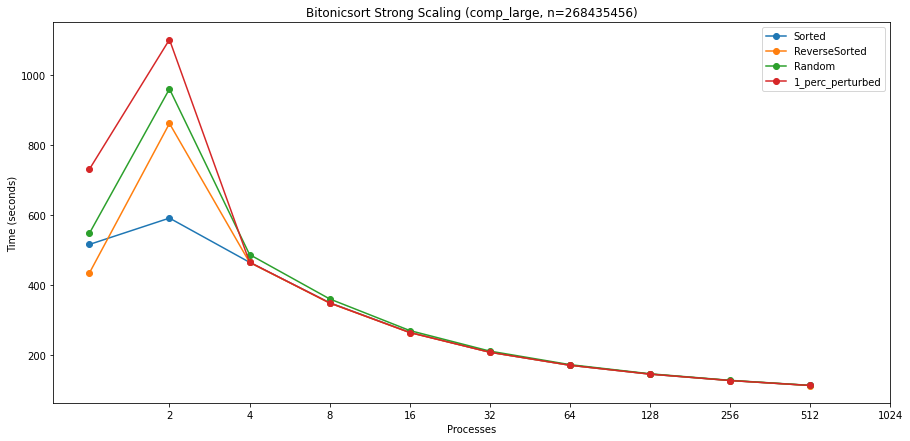

In [7]:
#iterate through nodes, and if comp_large, comm, or main, print the strong scaling
title_template = "Bitonicsort Strong Scaling ({}, n={})"
for node in tk['Random'].graph.traverse():

    if node.frame['name'] == 'main' or node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm':
        # for input size n, plot 4 plots for each input_type
        for arySize in input_size:

            fig = plt.figure(figsize=(15,7))
            ax = fig.add_subplot(1, 1, 1)
            
            # title will be node.frame['name']_input_size
            title = title_template.format(node.frame['name'], arySize)

            for in_type in input_type:
                df = tk[in_type].dataframe.loc[node, 'Avg time/rank'] # get average time
                df = (df.loc[df.index.get_level_values('input_size') == arySize])
                #df = df.unstack(level="input_type")
                df = df.unstack(level="input_size")
                ax.plot(df, marker='o')
                
            show_mpl_plot(fig, ax, title, "Processes", "Time (seconds)", input_type)
    


main


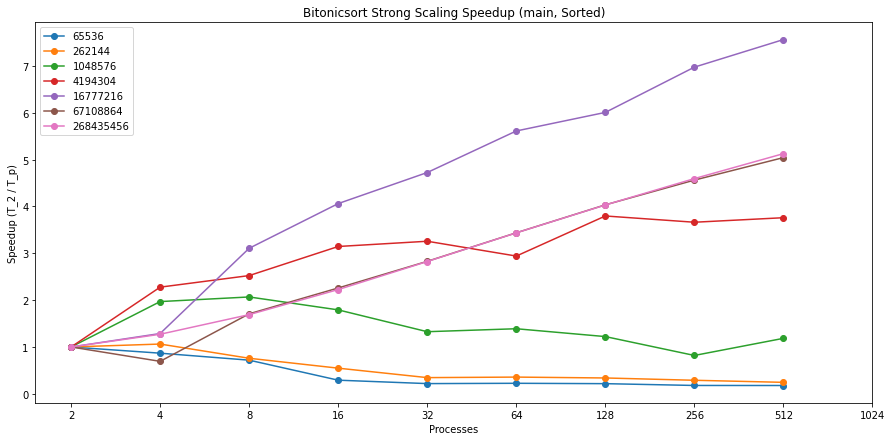

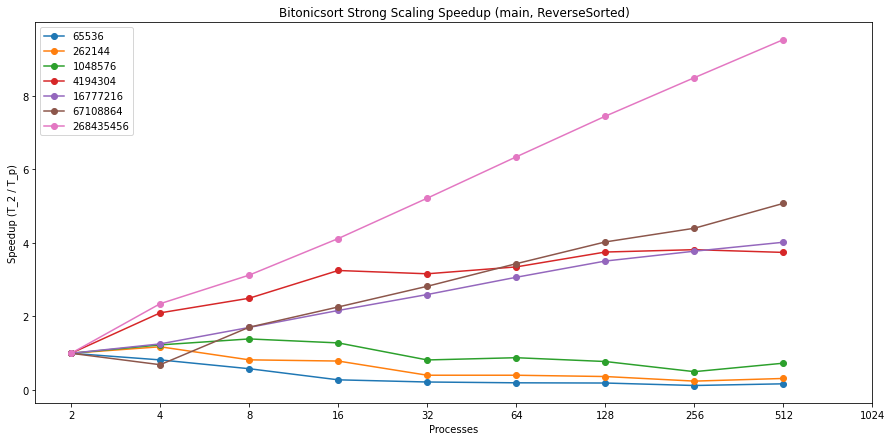

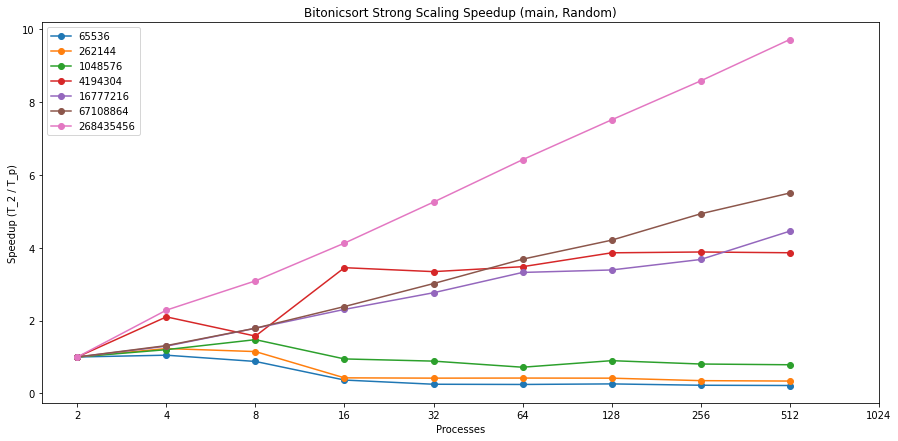

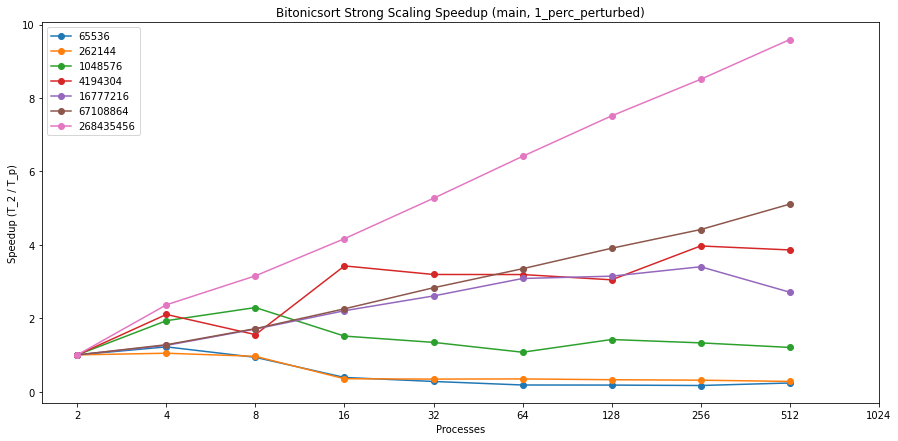

comm


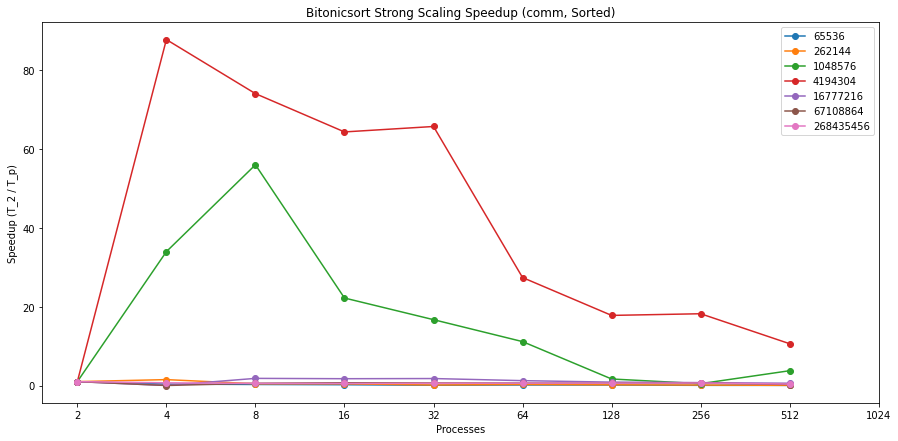

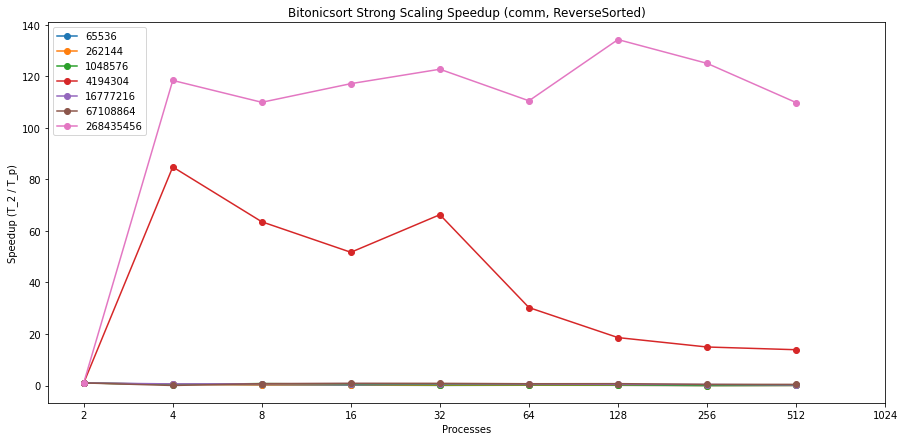

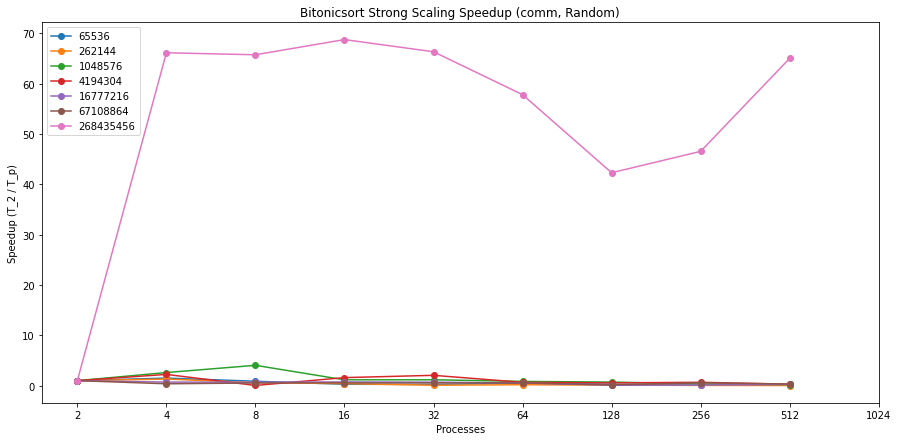

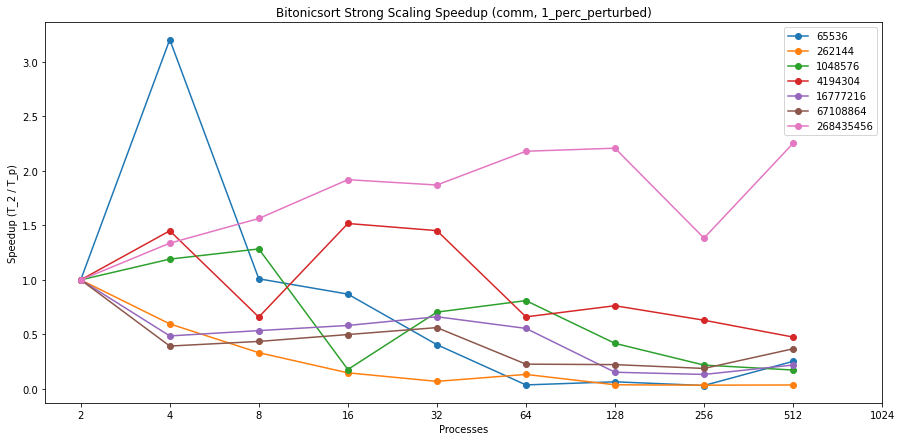

comp_large


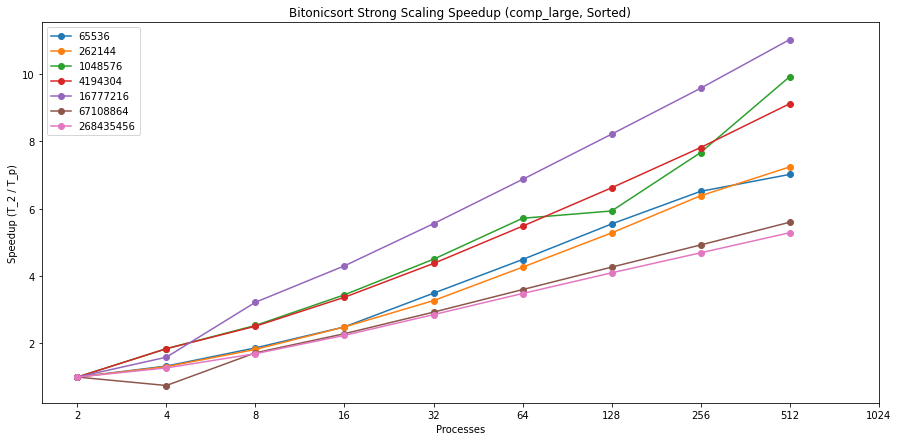

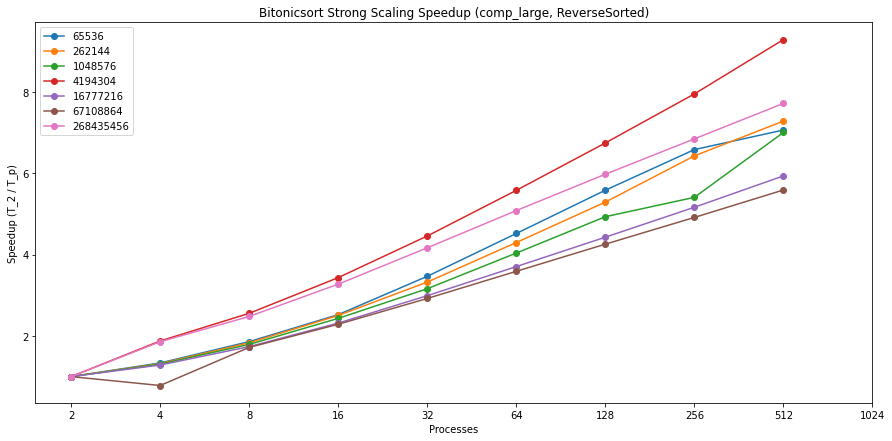

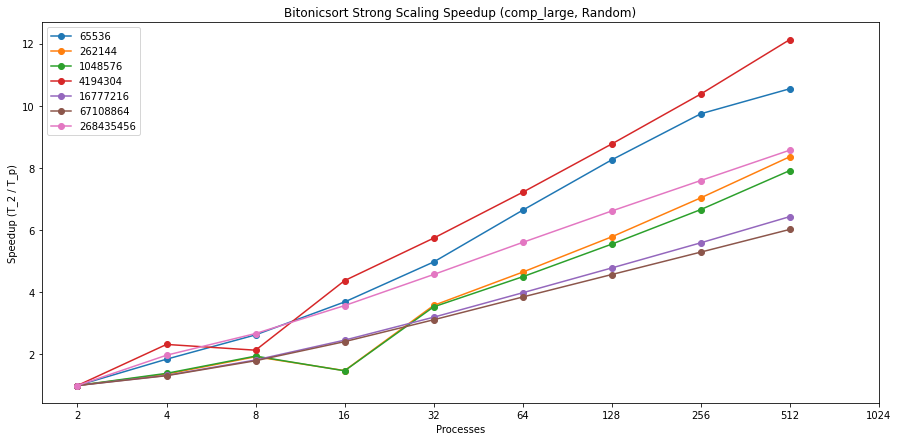

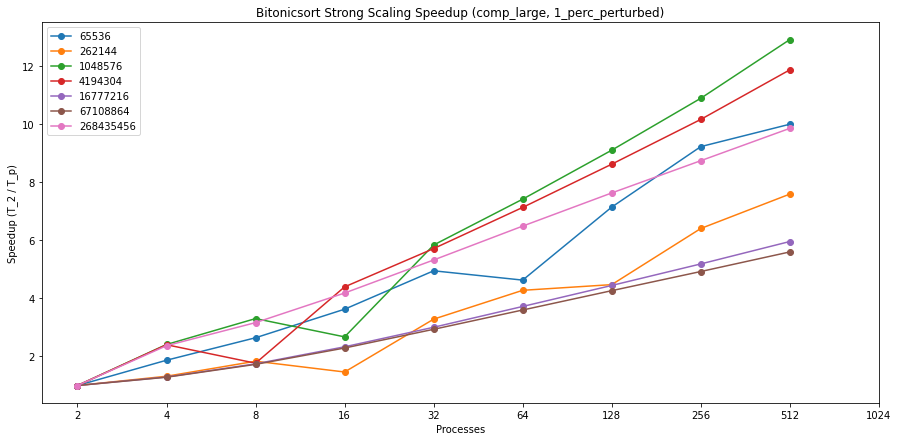

In [8]:
#iterate through nodes, and if comp_large, comm, or main, print the strong scaling
title_template0 = "Bitonicsort Strong Scaling Speedup ({}, {})"

for node in tk['Random'].graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm':
        # for input size n, plot 4 plots for each input_type
        print(node.frame['name'])
        for itype in input_type:
            # title will be node.frame['name']_input_size
            title = title_template0.format(node.frame['name'], itype)
            df = tk[itype].dataframe.loc[node, 'Avg time/rank'] # get average time
            #df = (df.loc[df.index.get_level_values('input_type') == itype])
            df = (df.loc[df.index.get_level_values('num_procs') >= 2])
            #df = (df.loc[df.index.get_level_values('num_procs') < 1024])
            df = df.unstack(level="input_size")
            #df = df.unstack(level="input_type")
            twoProcTimes = (df.loc[df.index.get_level_values('num_procs') == 2].values)[0]
            
            for i in range(0,len(twoProcTimes)):
                twoProc = twoProcTimes[i]
                df[input_size[i]] = (df[input_size[i]] / twoProc)**-1
            plot_mpl(df, title, "Processes", "Speedup (T_2 / T_p)", input_size)


p2-a262144-Sorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 36.84it/s]
0it [00:00, ?it/s]


p8-a1048576-Sorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 39.08it/s]
0it [00:00, ?it/s]


p32-a4194304-Sorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 39.14it/s]
0it [00:00, ?it/s]


p128-a16777216-Sorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 39.03it/s]
0it [00:00, ?it/s]


p512-a67108864-Sorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.69it/s]
0it [00:00, ?it/s]


p2-a262144-ReverseSorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 36.10it/s]
0it [00:00, ?it/s]


p8-a1048576-ReverseSorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]
0it [00:00, ?it/s]


p32-a4194304-ReverseSorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.97it/s]
0it [00:00, ?it/s]


p128-a16777216-ReverseSorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.88it/s]
0it [00:00, ?it/s]


p512-a67108864-ReverseSorted.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.69it/s]
0it [00:00, ?it/s]


p2-a262144-Random.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 39.11it/s]
0it [00:00, ?it/s]


p8-a1048576-Random.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 37.28it/s]
0it [00:00, ?it/s]


p32-a4194304-Random.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 35.91it/s]
0it [00:00, ?it/s]


p128-a16777216-Random.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 37.55it/s]
0it [00:00, ?it/s]


p512-a67108864-Random.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.72it/s]
0it [00:00, ?it/s]


p2-a262144-1_perc_perturbed.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.63it/s]
0it [00:00, ?it/s]


p8-a1048576-1_perc_perturbed.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.41it/s]
0it [00:00, ?it/s]


p32-a4194304-1_perc_perturbed.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 37.78it/s]
0it [00:00, ?it/s]


p128-a16777216-1_perc_perturbed.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 36.61it/s]
0it [00:00, ?it/s]


p512-a67108864-1_perc_perturbed.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 38.57it/s]
0it [00:00, ?it/s]


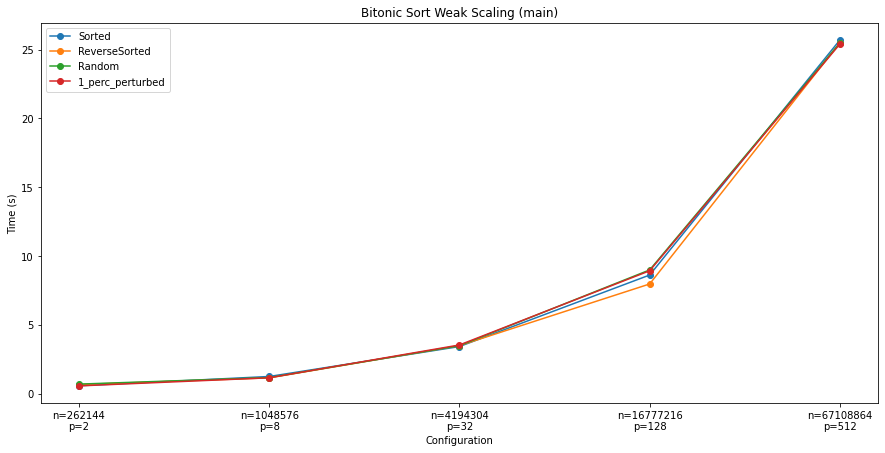

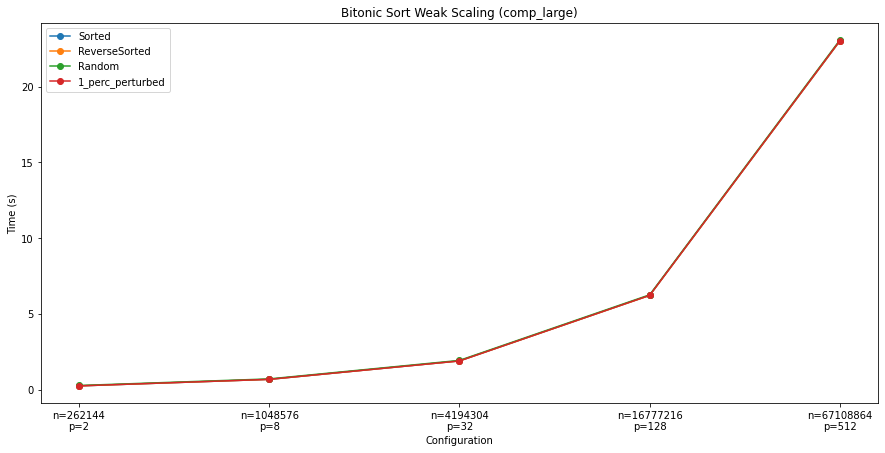

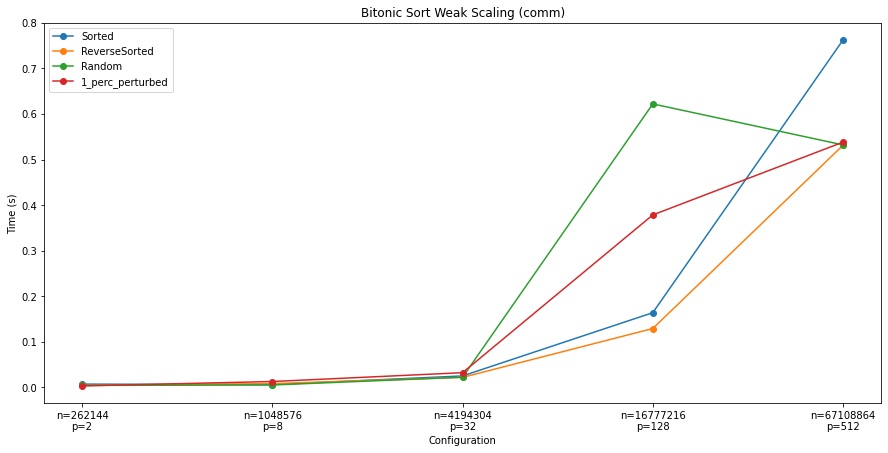

In [9]:
#iterate through nodes, and if comp_large, comm, or main, print the strong scaling
title_template0 = "Bitonic Sort Weak Scaling ({})"

np_pairs = [(2**20, 4), (2**22, 16), (2**24, 64), (2**26, 256), (2**28, 1024)]

# For use when 1024-processor runs are unavailable, for example because Grace broke.
# This can also be useful if an algorithm doesn't work with 2^28 array elements:
np_pairs_backup = [(2**18, 2), (2**20, 8), (2**22, 32), (2**24, 128), (2**26, 512)]
np_pairs = np_pairs_backup

x_labels = ['n={}\np={}'.format(n, p) for n, p in np_pairs]

data = {}
for itype in input_type:
    data[itype] = {region: [] for region in measurement_regions}

    for n, p in np_pairs:
        path = "p{}-a{}-{}.cali".format(p, n, itype)
        print(path)
        tk_tmp = th.Thicket.from_caliperreader(glob(path))
        tk_tmp.metadata_column_to_perfdata("num_procs")
        tk_tmp.metadata_column_to_perfdata("input_size")
        for node in tk_tmp.graph.traverse():
            if (node.frame['name'] not in measurement_regions):
                continue

            value = list(tk_tmp.dataframe.loc[node, 'Avg time/rank'])[0]
            #print(value)
            data[itype][node.frame['name']].append(value)

for region in measurement_regions:

    title = title_template0.format(region)

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    for t in input_type:
        ax.plot(range(len(data[t][region])), data[t][region], label=t, marker='o')
                          
    ax.set_title(title)
    ax.set_xlabel('Configuration')
    ax.set_ylabel('Time (s)')
    ax.legend()#legend)
    #plt.xscale("log", base=2)
    plt.xticks(range(len(np_pairs)))
    ax.set_xticklabels(x_labels)
    plt.savefig(f'Bitonic_Plots/{title}')
    plt.show()